# Project: digit recognizer
---

 Some say that the "Hello World!" of machine learning is building a classifier that recognizes 28x28 digits using the MNIST hand-written digit database. Sure, there are plenty of copy-and-paste tutorials out there, but here is my implementation where I have made an effort to write and understand every line within my implementation. 
 
This is a learning exercise for me, so there are plenty of notes inside to keep track of what I am doing and why. Enjoy!

##### Implementation details
- Originally set up for a Windows environment. You may need to tweak it if you are on a *NIX system
- If you are unsure if your graphics card is being utilized properly, you can run a quick script I wrote to check: https://github.com/Killian604/DoesTensorFlowDetectMyGPU

Note: I have tried to organize the first cell such that, if you are missing any dependencies, running the notebook will cancel as early as possible to avoid problems down the line. 

In [1]:
# Project/dependencies setup
try:
    import os as os
    import sys as sys
    import keras as k
    from keras.backend import tensorflow_backend as tb
    from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
    from keras.models import Sequential
    from keras.utils.np_utils import to_categorical # for one-hot-encoding
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from sklearn.naive_bayes import GaussianNB, MultinomialNB
    from sklearn.model_selection import train_test_split
    import tensorflow as tf
    print('Setup successful!')
except Exception as e:
    print("Setup failed:\n\t" + str(e))
    sys.exit(1)

Using TensorFlow backend.


Setup successful!


In [2]:
# TF session setup
# This code will allow gradual memory allocation instead of trying to allocate something like 4GB at once on your video card
random_seed = 2 # Random seed included for reproducability reasons. To remove it fully, you'll need to change test/train split()
np.random.seed(random_seed)
if tb._SESSION is None:
    if not os.environ.get('OMP_NUM_THREADS'):
        config = tf.ConfigProto(allow_soft_placement=True)
    else:
        num_thread = int(os.environ.get('OMP_NUM_THREADS'))
        config = tf.ConfigProto(intra_op_parallelism_threads=num_thread, allow_soft_placement=True)
    config.gpu_options.allow_growth=True
    _SESSION = tf.Session(config=config)
session = _SESSION

In [3]:
# Read in file
df = pd.read_csv("train.csv", dtype=np.float64)

In [4]:
labels = df.label.astype(np.int64).copy()
features = df.drop(labels=["label"], axis=1).copy() / 255.0
# print("Number of columns in 'features':", len(features.columns))

A histogram of label distribution.
It's nice to know that our labels have roughly the same likelihood.


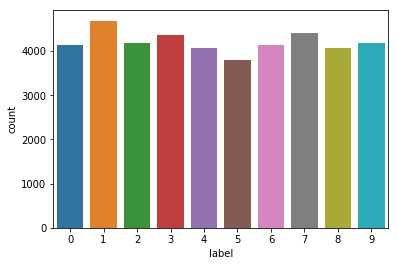

In [5]:
# Get a histogram of label distribution
sns.countplot(labels)
print("A histogram of label distribution.\nIt's nice to know that our labels have roughly the same likelihood.")

In [6]:
# One-hot encode labels
#   Reshape input pixel data from 1x784 to 28x28(x1)
features = features.values.reshape(-1,28,28,1)


# labels = labels.values.reshape(-1,28,28,1)
# Onehot encode labels
labels = to_categorical(labels, num_classes = 10)
# Flip it from a row vector to a column vector
labels = labels[:,0:1]

In [7]:
# Split up your date into test and train sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=random_seed)

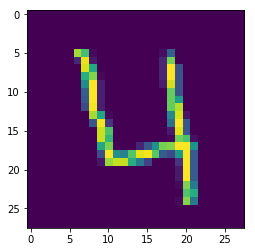

In [8]:
# View a digit
plt.imshow(features[3][:,:,0])

---
## Time to build a model

- arg filters: dimensionality of output space
- arg kernel size: 

In [9]:
# Build the model
model = Sequential()

model.add(Conv2D(filters=28,kernel_size=(1,1),
                padding = 'Same', activation='relu',
                input_shape=(28,28,1)))
# model.add(Conv2D(filters=100,kernel_size=(5,5),
#                 padding = 'Same', activation='relu',
#                 input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

---
## Time to declare your optimizer

Not all optimizers are built equally. A helpful guide (with visuals) can be found at:

http://ruder.io/optimizing-gradient-descent/index.html#rmsprop

In [10]:
# lr = learning rate,  (sometimes called alpha)
# rho = "Gradient moving average decay factor",
#     StackOverlfow:"RMSProp uses "rho" to calculate an exponentially weighted average over the square of the gradients.""
# epsilon=fuzz factor,
# decay = learning rate decay over each update
optimizer = k.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epochs = 2
batch_size = 100

---
## Now for the moment of truth: train your model!

In [11]:
history = model.fit(features_train, labels_train, epochs=epochs, batch_size=batch_size)
print()
loss_and_metrics = model.evaluate(features_test, labels_test) # WHAT IS THE DEFAULT BATCH SIZE?

print("Accuracy: ",loss_and_metrics[1], " | Loss: ", loss_and_metrics[0], sep="")

Epoch 1/2
37800/37800 [==============================] - 4s 94us/step - loss: 0.0532 - acc: 0.9844
Epoch 2/2
37800/37800 [==============================] - 2s 55us/step - loss: 0.0289 - acc: 0.9908

4200/4200 [==============================] - 0s 69us/step
Accuracy: 0.9907142857142858 | Loss: 0.025331435710901306
